# **Installing umap-learn**

In [1]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.1 MB/s eta 0:00:00


# **Importing required libraries**

In [2]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import umap

# **Loading PCA dataset**

In [3]:
# loading the PCA dataset
pca_data = pd.read_csv("/kaggle/input/pca-data/pca_data.txt", sep=" ", header=None)

# converting to a numpy array for easier processing
pca_array = pca_data.values

print(f"Shape of PCA Dataset: {pca_array.shape}")

Shape of PCA Dataset: (1000, 500)


# **Showing Original Data**

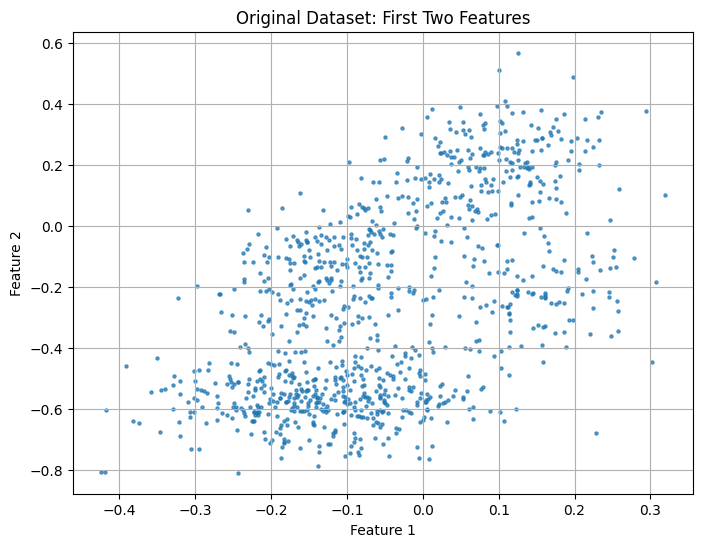

In [10]:
# plotting the original dataset using the first two features
plt.figure(figsize=(8, 6))
plt.scatter(pca_data.iloc[:, 0], pca_data.iloc[:, 1], s=5, alpha=0.7)
plt.title("Original Dataset: First Two Features")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

# **Performing PCA**

In [4]:
# performing PCA step by step
# step 1: normalizing the data by subtracting the mean
mean_vector = np.mean(pca_array, axis=0)
normalized_data = pca_array - mean_vector

# step 2: computing the covariance matrix
cov_matrix = np.cov(normalized_data, rowvar=False)

# step 3: computing eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# step 4: sorting eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

print(f"Top 2 Eigenvalues: {eigenvalues[:2]}")

Top 2 Eigenvalues: [20.11680094  6.05358582]


# **Projecting data onto top two principal components**

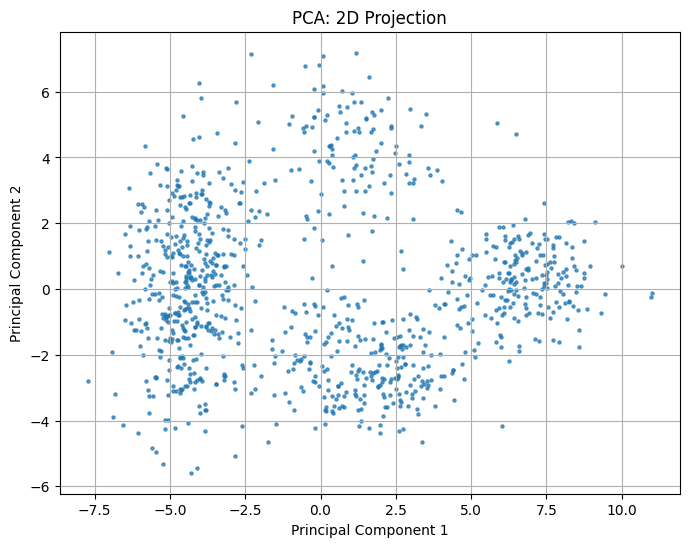

In [5]:
# selecting the top 2 eigenvectors
top_2_eigenvectors = eigenvectors[:, :2]

# projecting the data onto the top 2 eigenvectors
projected_data = np.dot(normalized_data, top_2_eigenvectors)

# ploting the data in 2D
plt.figure(figsize=(8, 6))
plt.scatter(projected_data[:, 0], projected_data[:, 1], s=5, alpha=0.7)
plt.title("PCA: 2D Projection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

# **Creating UMAP plot**

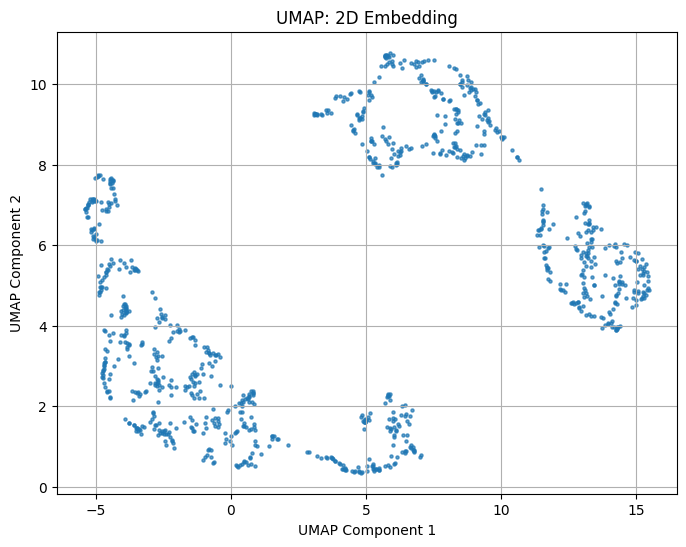

In [6]:
# using UMAP for dimensionality reduction
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2)
umap_embedding = reducer.fit_transform(pca_array)

# ploting UMAP
plt.figure(figsize=(8, 6))
plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], s=5, alpha=0.7)
plt.title("UMAP: 2D Embedding")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.grid(True)
plt.show()

# **Creating t-SNE plot**

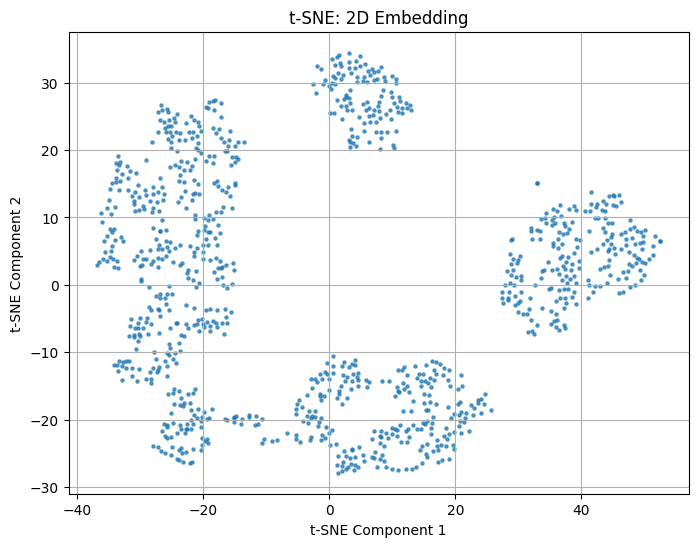

In [7]:
# using t-SNE for dimensionality reduction
tsne_embedding = TSNE(n_components=2, perplexity=30, random_state=42).fit_transform(pca_array)

# ploting t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(tsne_embedding[:, 0], tsne_embedding[:, 1], s=5, alpha=0.7)
plt.title("t-SNE: 2D Embedding")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.grid(True)
plt.show()

# **Loading EM dataset**

In [8]:
# loading the EM dataset
em_data = pd.read_csv("/kaggle/input/em-data/em_data.txt", sep=" ", header=None).values.flatten()

print(f"Number of Families: {len(em_data)}")

Number of Families: 1000


# **Implementing EM algorithm**

In [9]:
from scipy.special import factorial

# implementing the EM algorithm for poisson mixture model
def em_algorithm(data, num_iterations=100, tol=1e-6):
    # initializing parameters
    lambda1, lambda2 = np.random.uniform(1, 5, 2)  # mean of the two poisson distributions
    pi = 0.5  # proportion of families in the first group
    prev_ll = None

    for iteration in range(num_iterations):
        # E-step: computing responsibilities
        r1 = pi * (lambda1**data * np.exp(-lambda1)) / factorial(data)  # using scipy.special.factorial
        r2 = (1 - pi) * (lambda2**data * np.exp(-lambda2)) / factorial(data)
        gamma = r1 / (r1 + r2)

        # M-step: updating parameters
        lambda1 = np.sum(gamma * data) / np.sum(gamma)
        lambda2 = np.sum((1 - gamma) * data) / np.sum(1 - gamma)
        pi = np.mean(gamma)

        # computing log-likelihood
        ll = np.sum(np.log(pi * (lambda1**data * np.exp(-lambda1)) / factorial(data) +
                           (1 - pi) * (lambda2**data * np.exp(-lambda2)) / factorial(data)))

        # checking convergence
        if prev_ll is not None and abs(ll - prev_ll) < tol:
            break
        prev_ll = ll

    return lambda1, lambda2, pi

lambda1, lambda2, pi = em_algorithm(em_data)
print(f"Estimated parameters:")
print(f"Mean for group without family planning: {lambda1:.2f}")
print(f"Mean for group with family planning: {lambda2:.2f}")
print(f"Proportion without family planning: {pi:.2f}")
print(f"Proportion with family planning: {1-pi:.2f}")

Estimated parameters:
Mean for group without family planning: 4.91
Mean for group with family planning: 1.78
Proportion without family planning: 0.64
Proportion with family planning: 0.36
